In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL, seasonal_decompose
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [31]:
stock_data = yf.download('AAPL', start='2024-05-01', end='2025-01-20')
stock_data.info()

[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2024-05-01 to 2025-01-17
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   180 non-null    float64
 1   (High, AAPL)    180 non-null    float64
 2   (Low, AAPL)     180 non-null    float64
 3   (Open, AAPL)    180 non-null    float64
 4   (Volume, AAPL)  180 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 8.4 KB


In [32]:
stock_data

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2024-05-01,168.689621,172.087330,168.500304,168.968610,50383100
2024-05-02,172.406174,172.794767,170.273890,171.888044,94214900
2024-05-03,182.718842,186.325785,182.001436,185.977041,163224100
2024-05-06,181.054886,183.535899,179.769528,181.692578,78569700
2024-05-07,181.742386,184.233373,180.666293,182.788603,77305800
...,...,...,...,...,...
2025-01-13,234.399994,234.669998,229.720001,233.529999,49630700
2025-01-14,233.279999,236.119995,232.470001,234.750000,39435300


In [33]:
stock_data.index

DatetimeIndex(['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-06',
               '2024-05-07', '2024-05-08', '2024-05-09', '2024-05-10',
               '2024-05-13', '2024-05-14',
               ...
               '2025-01-03', '2025-01-06', '2025-01-07', '2025-01-08',
               '2025-01-10', '2025-01-13', '2025-01-14', '2025-01-15',
               '2025-01-16', '2025-01-17'],
              dtype='datetime64[ns]', name='Date', length=180, freq=None)

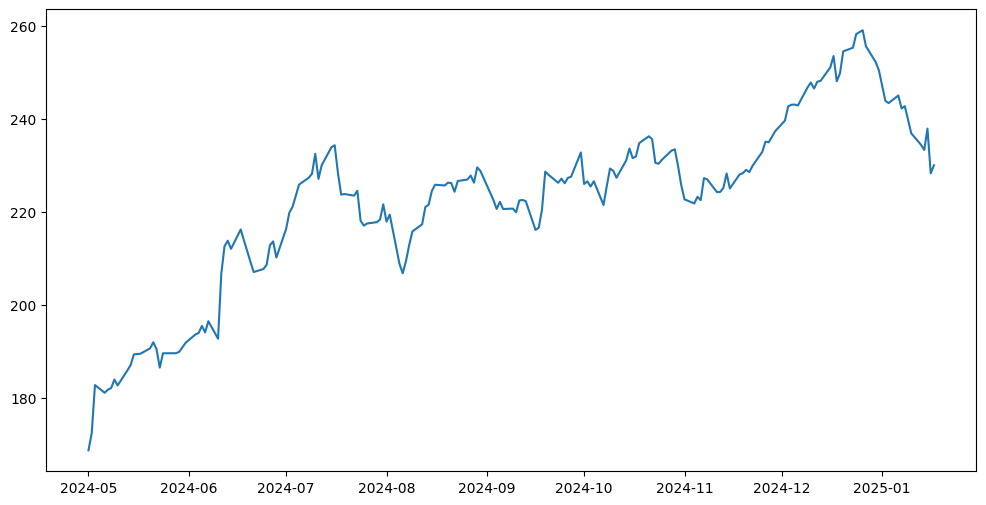

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data.index, stock_data['Close'])
plt.show()

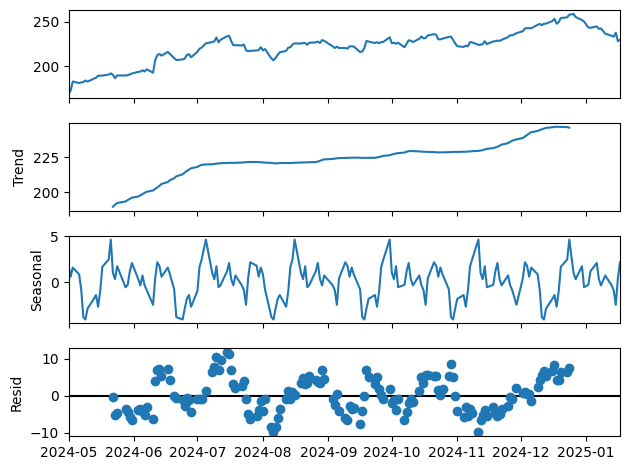

In [35]:
dc_additive = seasonal_decompose(stock_data['Close'], model='additive', period=30)
dc_additive.plot()
plt.show()
trends_additive = dc_additive.trend
seasonal_additive = dc_additive.seasonal
residual_additive = dc_additive.resid

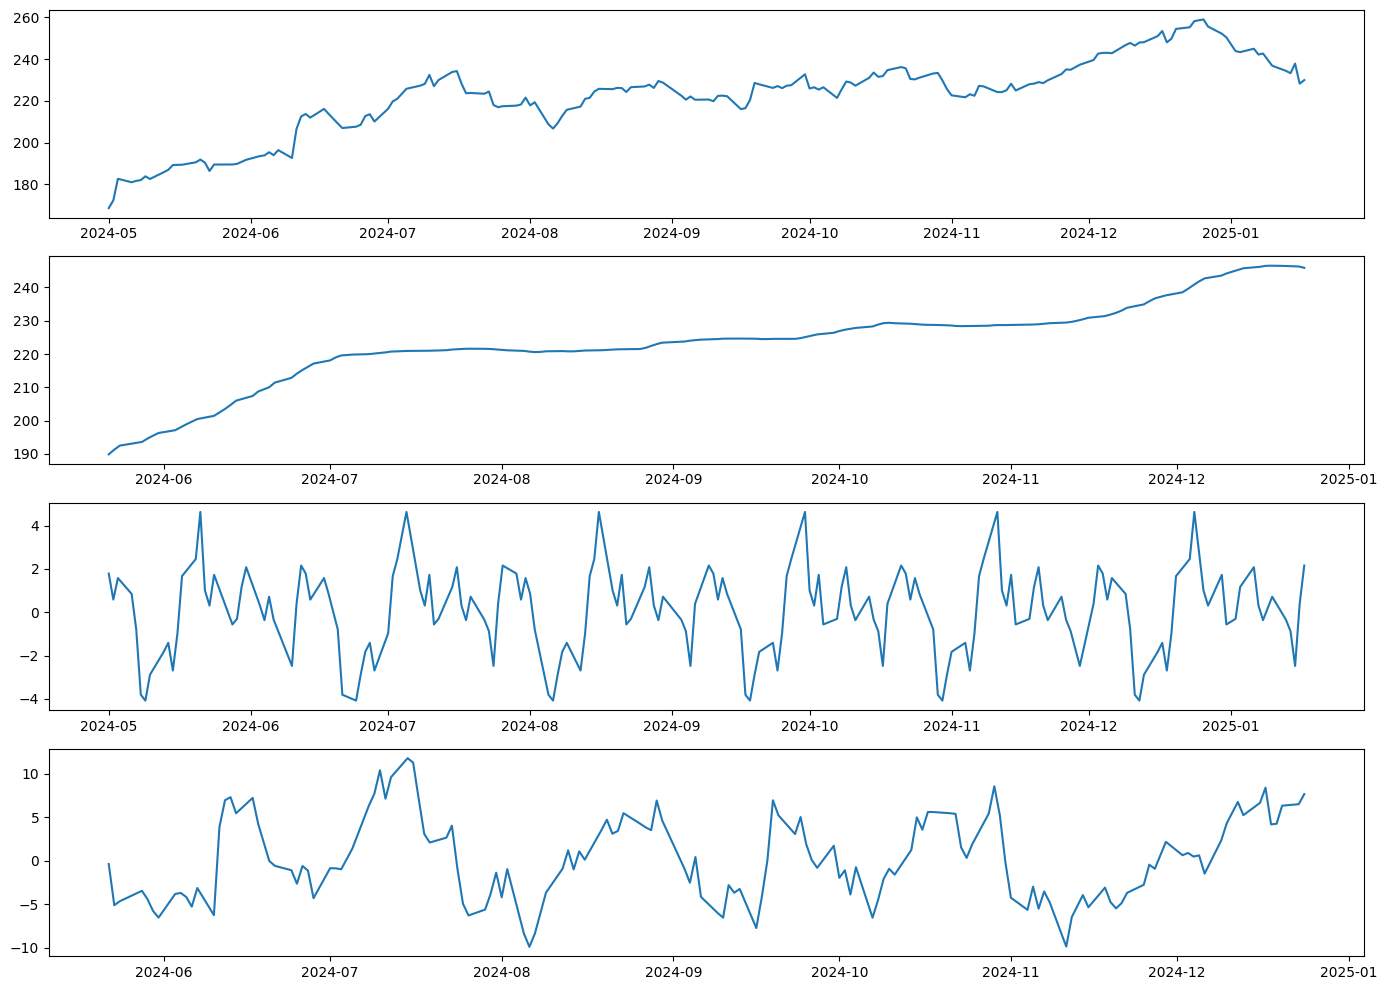

In [36]:
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(stock_data['Close'])
plt.subplot(412)
plt.plot(trends_additive)
plt.subplot(413)
plt.plot(seasonal_additive)
plt.subplot(414)
plt.plot(residual_additive)
plt.tight_layout()
plt.show()

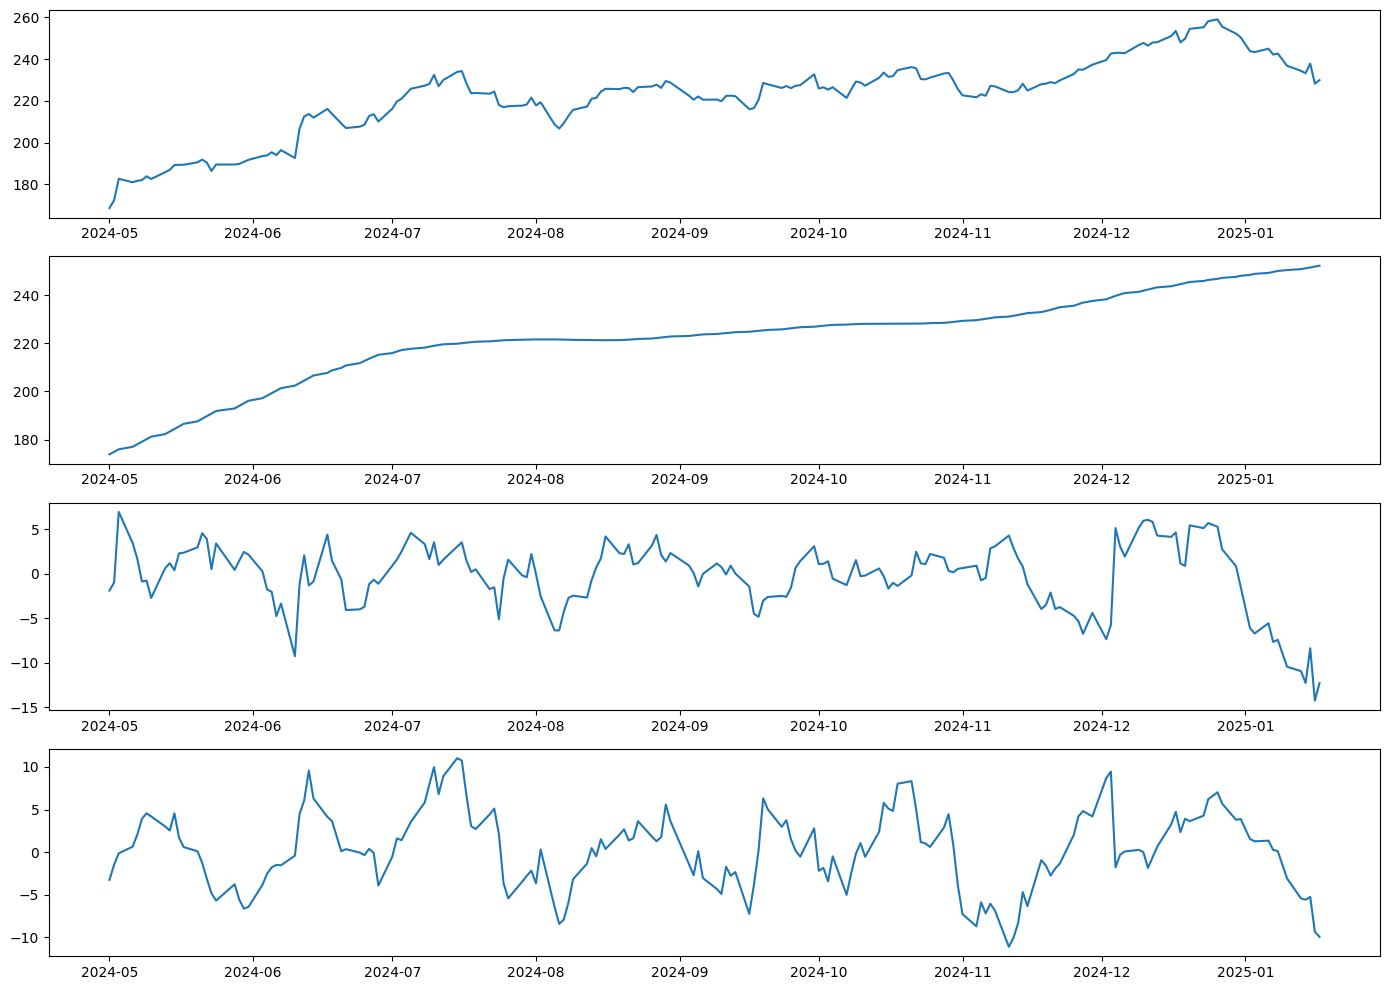

In [49]:
stl = STL(stock_data['Close'], period=30)
result = stl.fit()
plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(result.observed)
plt.subplot(412)
plt.plot(result.trend)
plt.subplot(413)
plt.plot(result.seasonal)
plt.subplot(414)
plt.plot(result.resid)
plt.tight_layout()
plt.show()